In [1]:
%matplotlib inline

import os
import pandas as pd

books_path = os.path.join("datasets", "books", "goodreads_books.csv")
books = pd.read_csv(books_path)

In [61]:
min_votes_category = 50
min_votes_ratings = 500
min_books_category = 100

def filter_by_genre(genre, books):
    return books\
    .loc[books.genre_and_votes.str.contains(genre, na=False), :]\
    .loc[books.rating_count.astype(int) > min_votes_ratings, :]

genres = pd.DataFrame(books.genre_and_votes.str.extractall('([^0-9,]+)([0-9]+)')).reset_index()
genres = genres.loc[genres[1].astype(int) > min_votes_category]
genres = pd.DataFrame(pd.Series(genres[0].str.strip()).value_counts())
genres = genres.loc[genres[0] > min_books_category, :]
genres['mean'] = genres.index
genres['std'] = genres.index

genres['pop'] =  genres['mean'].apply(
    lambda x: filter_by_genre(x, books).shape[0]
)
genres['mean'] = genres['mean'].apply(
    lambda x: filter_by_genre(x, books).average_rating.mean()
)
genres['std'] = genres['std'].apply(
    lambda x: filter_by_genre(x, books).average_rating.std()
)
genres['ci'] = 2.57 * (genres['std']/(genres['pop']**(1/2))) # 2.57 = 99%

In [62]:
genres

,0,mean,std,pop,ci
Fiction,13068,3.963758,0.271837,24635,0.004451
Fantasy,7666,4.026514,0.269463,11012,0.006599
Romance,6655,3.999452,0.265130,10786,0.006561
Young Adult,5683,3.967913,0.266768,8300,0.007525
Nonfiction,3857,4.073268,0.244419,5731,0.008298
...,...,...,...,...,...
European Literature-German Literature,111,3.973584,0.289195,332,0.040790
th Century,110,3.915496,0.283209,564,0.030648
Space-Space Opera,109,4.077280,0.238117,239,0.039584
GLBT-Queer,107,3.984930,0.258003,215,0.045221


In [63]:
genres = genres.sort_values(by='mean', ascending=False).reset_index()

In [42]:
# import matplotlib.pyplot as plt

# plt.errorbar(genres.index, genres.mean, xerr=0.5, yerr=genres.std,
#                linestyle='--', c='red')

# plt.show()

<ipython-input-67-1dd0d67c9e59>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.grid(b=True, which='major', color='#666666', linestyle='-')


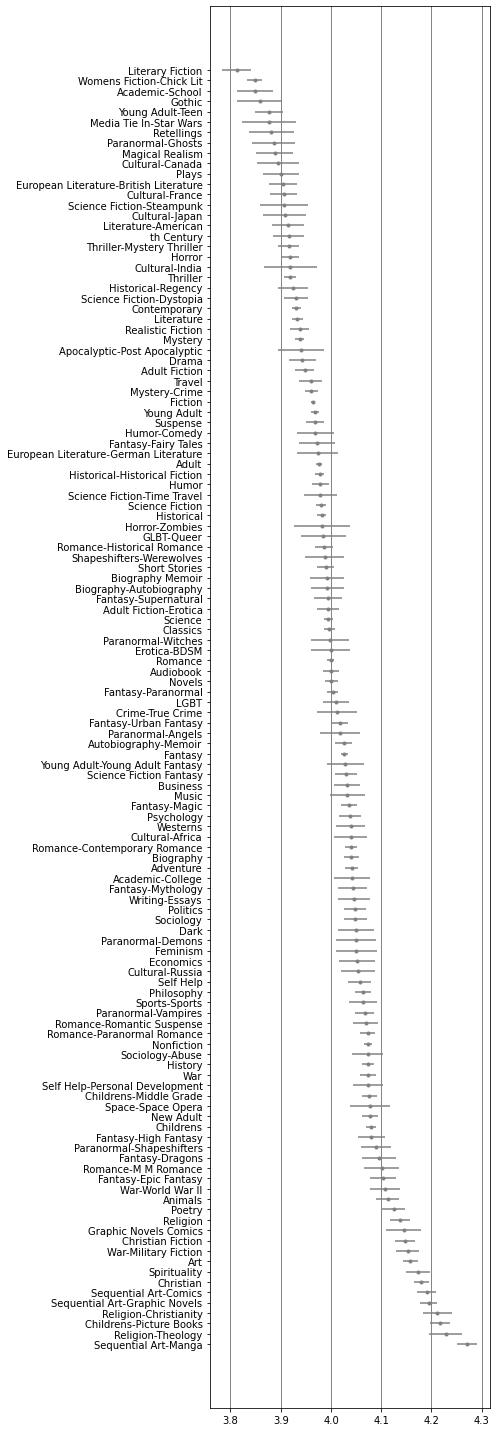

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7, 20]
plt.rcParams["figure.autolayout"] = True

plt.errorbar(genres['mean'], genres.index, xerr=genres['ci'], yerr=0,
               linestyle='None', c='gray', fmt='.')
plt.yticks(genres.index, labels=genres['index'])
plt.axes().xaxis.grid(b=True, which='major', color='#666666', linestyle='-')


plt.show()